# Brownlee, Jason (2019) Deep Learning With Python.Ed Brownlee, J. Ed. Machine Learning Mastery Pty. Ltd.
https://machinelearningmastery.com/

Problema: Predicción de series de tiempo.
Serie: Número mensual de pasajeros que viajaron en líneas aéreas en USA entre 1949 y 1960.  
Datos: Año-mes, número de pasajeros.  
Modelo: Red Neuronal - Red Neuronal Perceptron con dos capas y datos con Ventana Móvil  

In [25]:
import numpy
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense

In [26]:
# To make this notebook's output stable across runs
numpy.random.seed(42)

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "C:/Users/MII/Desktop/VP-Conce-2020/ML-Curso/ML-Jason Brownlee/Cap23"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Images")
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [27]:
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset[:10]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.]], dtype=float32)

In [28]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [30]:
len(dataset), train_size, test_size

(144, 96, 48)

In [31]:
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX, trainY

(array([[112., 118., 132.],
        [118., 132., 129.],
        [132., 129., 121.],
        [129., 121., 135.],
        [121., 135., 148.],
        [135., 148., 148.],
        [148., 148., 136.],
        [148., 136., 119.],
        [136., 119., 104.],
        [119., 104., 118.],
        [104., 118., 115.],
        [118., 115., 126.],
        [115., 126., 141.],
        [126., 141., 135.],
        [141., 135., 125.],
        [135., 125., 149.],
        [125., 149., 170.],
        [149., 170., 170.],
        [170., 170., 158.],
        [170., 158., 133.],
        [158., 133., 114.],
        [133., 114., 140.],
        [114., 140., 145.],
        [140., 145., 150.],
        [145., 150., 178.],
        [150., 178., 163.],
        [178., 163., 172.],
        [163., 172., 178.],
        [172., 178., 199.],
        [178., 199., 199.],
        [199., 199., 184.],
        [199., 184., 162.],
        [184., 162., 146.],
        [162., 146., 166.],
        [146., 166., 171.],
        [166., 171.,

In [34]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
 - 0s - loss: 19605.8055
Epoch 2/100
 - 0s - loss: 4510.8556
Epoch 3/100
 - 0s - loss: 1976.2471
Epoch 4/100
 - 0s - loss: 1934.3170
Epoch 5/100
 - 0s - loss: 1908.9232
Epoch 6/100
 - 0s - loss: 1943.6289
Epoch 7/100
 - 0s - loss: 1835.8976
Epoch 8/100
 - 0s - loss: 1791.3546
Epoch 9/100
 - 0s - loss: 1784.0419
Epoch 10/100
 - 0s - loss: 1748.7789
Epoch 11/100
 - 0s - loss: 1729.5338
Epoch 12/100
 - 0s - loss: 1735.0333
Epoch 13/100
 - 0s - loss: 1753.3304
Epoch 14/100
 - 0s - loss: 1662.9574
Epoch 15/100
 - 0s - loss: 1619.3189
Epoch 16/100
 - 0s - loss: 1637.4580
Epoch 17/100
 - 0s - loss: 1585.5625
Epoch 18/100
 - 0s - loss: 1558.1809
Epoch 19/100
 - 0s - loss: 1552.3923
Epoch 20/100
 - 0s - loss: 1538.0705
Epoch 21/100
 - 0s - loss: 1530.1952
Epoch 22/100
 - 0s - loss: 1454.4278
Epoch 23/100
 - 0s - loss: 1450.8901
Epoch 24/100
 - 0s - loss: 1438.0181
Epoch 25/100
 - 0s - loss: 1399.4417
Epoch 26/100
 - 0s - loss: 1365.2503
Epoch 27/100
 - 0s - loss: 1341.7672
Epoch 28/

In [33]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 523.21 MSE (22.87 RMSE)
Test Score: 2277.86 MSE (47.73 RMSE)


In [12]:
# Generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [13]:
# Shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [14]:
# Shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Saving figure Pronóstico con Perceptrón + Ventana Móvil


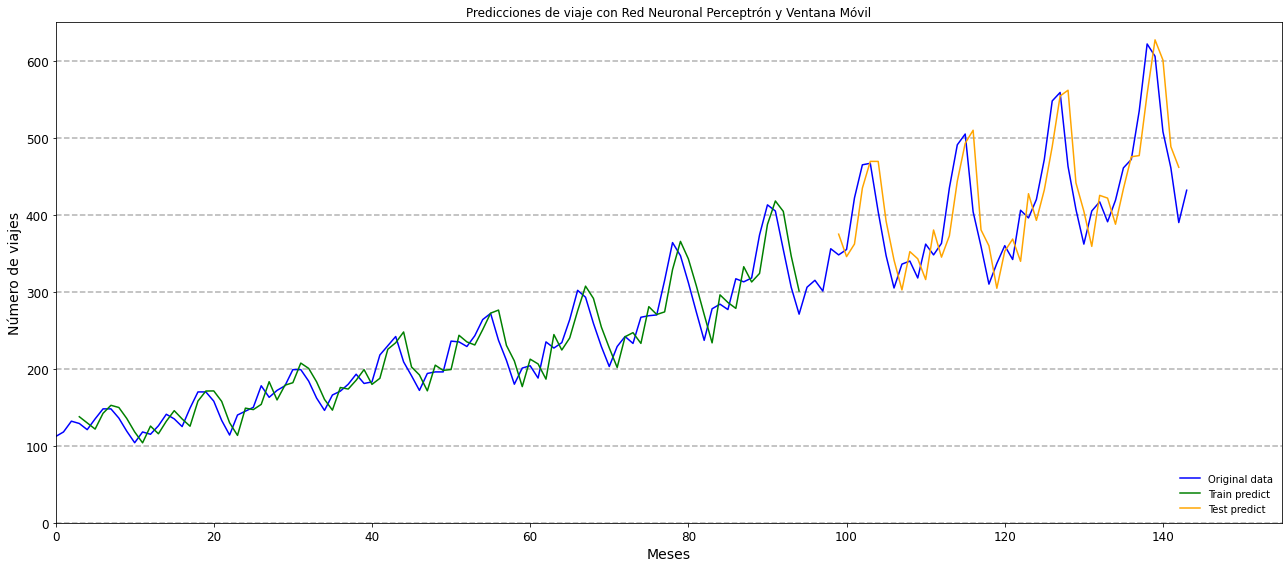

In [16]:
# Plot original data and predictions
fig, ax = plt.subplots(figsize=(18,8)) # Tamaño del gráfico
plt.plot(dataset, color="blue", label="Original data")

#Título del gráfico
ax.set_title('Predicciones de viaje con Red Neuronal Perceptrón y Ventana Móvil')

# Define del eje y
ax.set_ylabel('Número de viajes')
plt.grid(True, 'major', 'y', ls='--', lw=1.5, c='k', alpha=.3)

#Define el eje x
ax.set_xlabel('Meses')
plt.tick_params(axis='x', which='major', labelsize=12)

plt.axis([0, 155,0,650])

plt.plot(trainPredictPlot, color="green", label="Train predict")
plt.plot(testPredictPlot, color="orange", label="Test predict")
ax.legend(loc="lower right", title="", frameon=False)


plt.show()
#save_fig("Pronóstico con Perceptrón + Ventana Móvil")